In [2]:
import numpy as np
import matplotlib.pyplot as plt

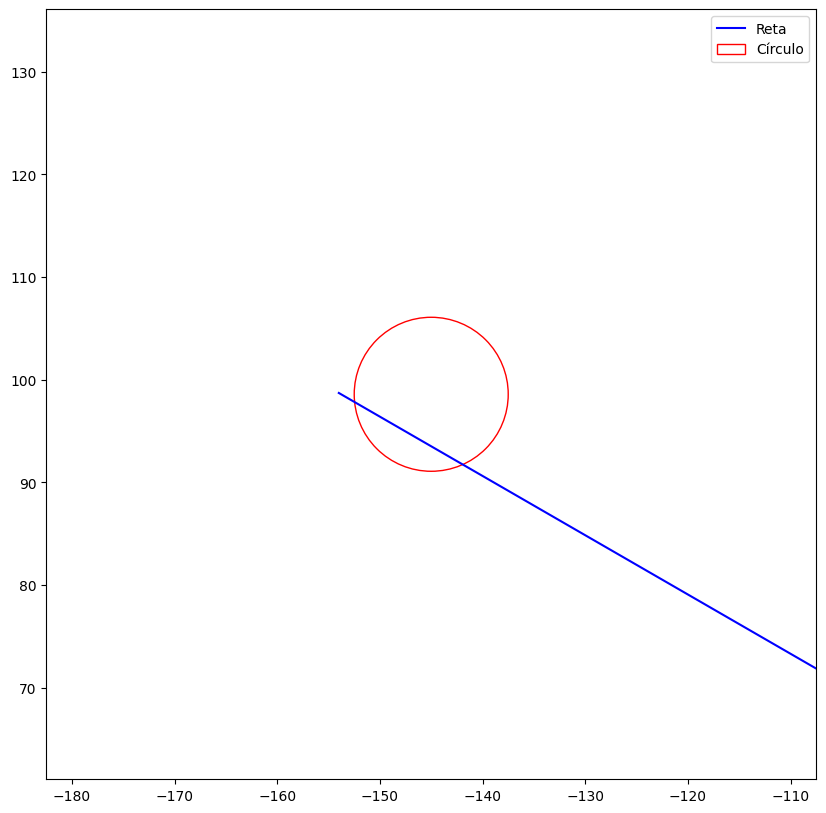

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Pontos inicial e final da reta
ponto_inicial = (0,9.8)
ponto_final = (-154.000000,98.711941)

# Centro e raio do círculo
centro_do_circulo = (-145.000000,98.583606)
raio_do_circulo = 7.5

# Calcular o comprimento da reta
comprimento_da_reta = np.sqrt((ponto_final[0] - ponto_inicial[0])**2 + (ponto_final[1] - ponto_inicial[1])**2)

# Escolher uma escala para a visualização
escala = 10  # cada unidade na visualização será equivalente a 10 unidades reais

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 10))

# Desenhar a reta
reta_x = [ponto_inicial[0], ponto_final[0]]
reta_y = [ponto_inicial[1], ponto_final[1]]
ax.plot(reta_x, reta_y, color='blue', label='Reta')

# Desenhar o círculo
circulo = plt.Circle(centro_do_circulo, raio_do_circulo, color='red', fill=False, label='Círculo')
ax.add_artist(circulo)

# Configurar os limites dos eixos
limite_x = [min(ponto_inicial[0], ponto_final[0]) - raio_do_circulo, max(ponto_inicial[0], ponto_final[0]) + raio_do_circulo]
limite_y = [min(ponto_inicial[1], ponto_final[1]) - raio_do_circulo, max(ponto_inicial[1], ponto_final[1]) + raio_do_circulo]
ax.set_xlim(centro_do_circulo[0]- 5*raio_do_circulo,centro_do_circulo[0] + 5*raio_do_circulo)
ax.set_ylim(centro_do_circulo[1]- 5*raio_do_circulo,centro_do_circulo[1] + 5*raio_do_circulo)

# Adicionar grade e legenda
ax.legend()

# Mostrar a visualização
plt.gca().set_aspect('equal', adjustable='box')  # Assegurar proporção de aspecto igual
plt.show()


In [52]:
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio.v2 as imageio  # Importando a versão 2 especificamente

# Carregar dados do arquivo TXT
data = np.loadtxt('example.txt')

# Configurações iniciais do plot
fig, ax = plt.subplots()
ax.set_xlim(-304,304)
ax.set_ylim(0, 910)

# Lista para armazenar os frames
filenames = []

for i in range(len(data)):
    ax.clear()
    ax.set_xlim(-324,324)
    ax.set_ylim(0, 910)

    ax.plot([0,0],[0,9.8], color='blue')
    ax.plot([150,150],[0,9.8], color='blue')

    ax.plot([0,-154],[9.8,9.8 + 154*np.tan(np.pi*30/180)], color='blue')
    ax.plot([150,304],[9.8,9.8 + 154*np.tan(np.pi*30/180)], color='blue')
    ax.plot([-154,-154],[9.8 + 154*np.tan(np.pi*30/180),910], color='blue')
    ax.plot([304,304],[9.8 + 154*np.tan(np.pi*30/180),910], color='blue')
    ax.scatter(data[i, 0], data[i, 1], color='red')  # Destaca a posição atual
    
    # Salvar o frame
    filename = f'./frames/frame_{i}.png'
    plt.gca().set_aspect('equal', adjustable='box')  # Assegurar proporção de aspecto igual
    plt.savefig(filename)
    filenames.append(filename)

# Criar GIF
with imageio.get_writer('./frames/particula_movimento.gif', mode='I', duration=0.05) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        # Remover os arquivos de frame para limpeza
        os.remove(filename)

plt.close()
